In [1]:
import fields
import simulation
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.rcParams.update({'font.size': 10, 'figure.dpi': 100, 'figure.figsize': (4.7747, 4)})

## Demonstrate cartesian and matrix indexing in Matplotlib
Matplotlib expects matrix indexing for imshow. The followin illustrates the indexing with cartesian coordinate tuples (x, y) in a 2d array:

    a = [[(0, 0), (1, 0)],
         [(0, 1), (1, 1)]]

Note that: `a[0, 1] == (1, 0)`, and generally: `a[y, x] == (x, y)`

We also plot a single quiver arrow, which we see is placed and pointed with cartesian indexing

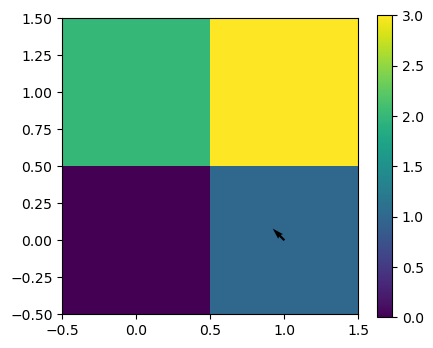

In [2]:
c = plt.imshow([[0, 1], [2, 3]], origin='lower')
plt.colorbar(c)
plt.quiver([1], [0], [-1], [1])

## Demonstrate four-warm encoding
The four warm encoding gives a weight to each of the two or four corners/indices closest to the given location. In the plot below, the white grid gives the indices - note that the heatmap is offset, so each colored square shows the weight of the corner in the center of the square. The orange cross the truncated position of the particle, while the blue circle shows the actual position.

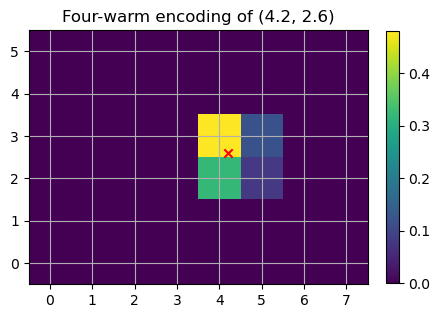

In [3]:
shape = (6, 8)
x, y = 4.2, 2.6
four_warm = simulation.four_warm_position(shape, shape, (x, y))

plt.title('Four-warm encoding of (4.2, 2.6)')
c = plt.imshow(four_warm, origin='lower')
plt.colorbar(c, fraction=0.034)
plt.scatter(x, y, marker='x', color='red')
plt.grid()
plt.savefig('four-warm-encoding.png')

## A full demo with scalar potential, vector field and simulation

In [4]:
size=256
field = fields.scalar_field(size, rng=np.random.default_rng(seed=3))
field = fields.trap(field)

vectors = fields.vector_field(field)

In [5]:
steps = 500
positions = simulation.simulate(vectors, 0.9, initial_position=(size//2, size//2), steps=steps)

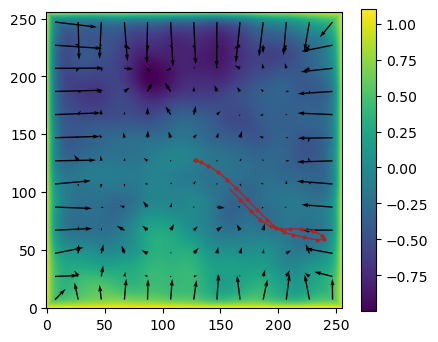

In [6]:
c = plt.imshow(field, origin='lower')
plt.colorbar(c)

o = 7  # Offset from the edges (To avoid extreme arrow sizes)
s = 20 # Plot a vector arrow every s points
x, y = np.meshgrid(np.arange(size), np.arange(size))
plt.quiver(x[o::s, o::s], y[o::s, o::s], vectors[o::s, o::s, 0], vectors[o::s, o::s, 1])

plt.plot(positions[:,0], positions[:,1], marker='o', color='firebrick', markevery=20, markersize=2, linewidth=1)